<a href="https://colab.research.google.com/github/RaymondLeong94/Omdena-Project-2/blob/main/GoE_EDA_cleaning_and_rationals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NaN EDA -> Mock data results through NN -> ? -> Profit

______

Part 1:
Clean_data_GK.csv called raw df

Missing values not handled yet, waiting on team’s comments

Generated mock recommendation system “dataframe” for 10,000 users and their current pillar score

Dataframe 2 for said 10,000 users after a user changes it

Dataframe standard (0.5) for a holistic approach




# #1 First dive into the data

In [1]:
#mount drive and load file
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [2]:
%cd gdrive/MyDrive

/content/gdrive/MyDrive


In [3]:
#import csv
import csv
import pandas as pd

raw_df = pd.read_csv('/content/gdrive/MyDrive/GoE/Clean_data_GK.csv')

In [4]:
#make list of columns for future usage
list_raw_df= raw_df.columns.tolist()

In [5]:
#set options
pd.set_option('display.max_columns', None)
raw_df

,ID,Title,Pillar,Instructor,Categories,Difficulty,Difficulty_Num,Duration,Duration_Num,Require_Movement,Require_Movemen_Num,Tags,Source,Type,Audio,Recipe,Text,Video,Visualization,Activity,Beauty,Nutrition,Rest
0,14,A comprehensive guide to essential vitamins an...,Nutrition,NaN,Education,Intermediate,2,6-15 min,3,No,0.0,"Guide, Wellness, Education, Comprehensive, Nut...",Mockup,"Text, Video",0,0,1,1,0,0,0,1,0
1,122,A comprehensive guide to nutritional balance,Nutrition,NaN,Education,Intermediate,2,6-15 min,3,No,0.0,"Guide, Wellness, Education, Comprehensive, Nut...",Mockup,"Text, Video",0,0,1,1,0,0,0,1,0
2,352,A comprehensive guide to nutritional basics,Nutrition,NaN,Education,Intermediate,2,6-15 min,3,No,0.0,"Guide, Wellness, Education, Comprehensive, Nut...",Mockup,"Text, Video",0,0,1,1,0,0,0,1,0
3,280,A comprehensive guide to nutritional essentials,Nutrition,NaN,Education,Intermediate,2,6-15 min,3,No,0.0,"Guide, Wellness, Education, Essentials, Compre...",Mockup,"Text, Video",0,0,1,1,0,0,0,1,0
4,174,A comprehensive guide to vitamins and minerals,Nutrition,NaN,Education,Intermediate,2,6-15 min,3,No,0.0,"Guide, Wellness, Education, Comprehensive, Nut...",Mockup,"Text, Video",0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,231,Yoga for the lower back,Rest,Julie Chinmayi,Mind and body,Beginner,1,6-15 min,3,NaN,NaN,Yoga,Real,Video,0,0,0,1,0,0,0,0,1
424,99,Yoga foundations - concentration,Rest,Julie Chinmayi,Mind and body,Beginner,1,6-15 min,3,NaN,NaN,"Yoga Foundations, Yoga",Real,Video,0,0,0,1,0,0,0,0,1
425,323,Yoga foundations - finding balance,Rest,Julie Chinmayi,Mind and body,Intermediate,2,15 - 30 min,4,NaN,NaN,"Yoga Foundations, Yoga, Relaxation",Real,Video,0,0,0,1,0,0,0,0,1
426,383,Yoga foundations - non-attachment,Rest,Julie Chinmayi,Mind and body,Beginner,1,6-15 min,3,NaN,NaN,"emotional release, Yoga Foundations, Yoga",Real,Video,0,0,0,1,0,0,0,0,1


In [6]:
#find all the non nan values
raw_df.isna().sum()

ID                       0
Title                    0
Pillar                   0
Instructor             202
Categories              53
Difficulty              32
Difficulty_Num           0
Duration                32
Duration_Num             0
Require_Movement       240
Require_Movemen_Num    240
Tags                    29
Source                   0
Type                     0
Audio                    0
Recipe                   0
Text                     0
Video                    0
Visualization            0
Activity                 0
Beauty                   0
Nutrition                0
Rest                     0
dtype: int64

In [7]:
#doublecheck for duplicate title entries
raw_df.Title.nunique()

428

From this we see that out of 428 rows

- id is the unique id
- title may requires language processing for our recommendation system
- 202 of instructors are missing - is there an difference with preferred instructors.
- 53 categories are unidentified - which can be filled in
- difficulty & duration can be remade into nlp.
- required movement and required movement number can be placed in with nlp/pca
- missing tags can be manually inputted if necessary but its okay to put unknown and test it out
______________________

# #2 Generating Mock recommendation system results and hard coding the solution first of whether users should increase or decrease pillars

In [8]:
#Approach 1, our database of n users to the 428 unique titles but the goal is to recreate the following
import numpy as np
np.random.seed(43)
# Create random values between -1 and 1 for 100000 users and how they are rated for each column
dataframe = pd.DataFrame(np.random.random((100000,4)), columns = ['Pillar 1', 'Pillar 2', 'Pillar 3' ,'Pillar 4'])

In [9]:
#this dataframe represents initial values
dataframe.head(5)

,Pillar 1,Pillar 2,Pillar 3,Pillar 4
0,0.115055,0.609067,0.133391,0.240590
1,0.327139,0.859137,0.666090,0.541162
2,0.029014,0.733748,0.394950,0.802047
3,0.254421,0.056885,0.866649,0.221029
4,0.404989,0.316096,0.076663,0.843225


In [10]:
#create a second dataframe where all scores are impacted based on an updated df after the user has inputted a response
dataframe2 = pd.DataFrame(np.random.random((100000,4)), columns = ['Pillar 1', 'Pillar 2', 'Pillar 3' ,'Pillar 4'])

In [11]:
#this is the change
dataframe2.head(5)

,Pillar 1,Pillar 2,Pillar 3,Pillar 4
0,0.964792,0.493116,0.251230,0.453194
1,0.368565,0.585630,0.914452,0.955842
2,0.028324,0.332774,0.031081,0.268343
3,0.608275,0.198986,0.249062,0.280100
4,0.748231,0.755591,0.266596,0.019851


In [12]:
#assuming that we want everyone to be holistic we introduce a standard dataframe to compare with the value .5
#create another dataframe for comparison called df_std
df_standard = pd.DataFrame(0.5, index=range(100000), columns = ['Pillar 1', 'Pillar 2', 'Pillar 3' ,'Pillar 4'])

In [13]:
df_standard.head(5)

,Pillar 1,Pillar 2,Pillar 3,Pillar 4
0,0.5,0.5,0.5,0.5
1,0.5,0.5,0.5,0.5
2,0.5,0.5,0.5,0.5
3,0.5,0.5,0.5,0.5
4,0.5,0.5,0.5,0.5


______________________________

Overview 2

Train_x was made for original df

Train y was made for standard df (df we’re trying to approach)

**Goal was to make df_std the reach value and df2_update2 represents changes needed from  df_2 (after recommendation changes) to be under guise of holistic**

Val loss minimized to 10^-7/-8 (need to find suitable matrix

Comparison df tells us what needs to go up or down for each pillar for each user.


In [14]:
#import tensor flow and compare dfs to create the output of whether a person should go up or down on each pillar fo the entire df
#the primary problem is output is going to be very basic
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler


# Normalize the DataFrames using Min-Max scaling
scaler = MinMaxScaler()
df1_normalized = scaler.fit_transform(dataframe)
df2_normalized = scaler.transform(dataframe2)
df3_normalized = scaler.transform(df_standard)

# Define the neural network architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(4)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Prepare the training data
train_X = df1_normalized
train_y = df3_normalized

# Train the neural network
model.fit(train_X, train_y, epochs=10, batch_size=32, validation_split=0.2)

# Apply the model to the second DataFrame
updated_values = model.predict(df2_normalized)
df2_updated = pd.DataFrame(updated_values, columns=['Pillar 1', 'Pillar 2', 'Pillar 3', 'Pillar 4'])

# Print the updated DataFrame
print(df2_updated)


Epoch 1/10
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0045 - val_loss: 1.1218e-05
Epoch 2/10
2500/2500 [==============================] - 7s 3ms/step - loss: 5.5684e-06 - val_loss: 2.3292e-06
Epoch 3/10
2500/2500 [==============================] - 6s 2ms/step - loss: 1.2817e-06 - val_loss: 4.1482e-07
Epoch 4/10
2500/2500 [==============================] - 10s 4ms/step - loss: 5.2323e-07 - val_loss: 2.5628e-07
Epoch 5/10
2500/2500 [==============================] - 8s 3ms/step - loss: 3.8874e-07 - val_loss: 3.5784e-07
Epoch 6/10
2500/2500 [==============================] - 6s 3ms/step - loss: 4.5281e-07 - val_loss: 2.4743e-08
Epoch 7/10
2500/2500 [==============================] - 6s 2ms/step - loss: 3.6288e-07 - val_loss: 1.5722e-06
Epoch 8/10
2500/2500 [==============================] - 5s 2ms/step - loss: 4.0746e-07 - val_loss: 4.3131e-09
Epoch 9/10
2500/2500 [==============================] - 6s 3ms/step - loss: 3.3566e-07 - val_loss: 2.1702e-07
Epoch 10/10
3

In [15]:
#now we look at this we see the need for a comparison
import pandas as pd

def compare_rows(dataframe, dataframe2, df2_updated, num_rows):
    # Get the specified number of rows from the updated DataFrame
    rows_to_compare = df2_updated.head(num_rows)

    # Compare the values with the corresponding rows in the original DataFrame
    comparison_result = {}
    num_rows = 1
    for column in dataframe.columns:
        diff = rows_to_compare[column].values - dataframe.head(num_rows)[column].values
        comparison_result[column] = ['Up' if d > 0 else 'Down' for d in diff]

    # Create a DataFrame from the comparison result
    comparison_df = pd.DataFrame(comparison_result)

    return comparison_df


In [16]:
# Assuming dataframe and dataframe2 are defined

# Set the number of rows to compare
num_rows = 5

# Call the compare_rows function
comparison_result = compare_rows(dataframe, df_standard, df2_updated, num_rows)

# Print the comparison result
print(comparison_result)


  Pillar 1 Pillar 2 Pillar 3 Pillar 4
0       Up     Down       Up       Up
1       Up     Down       Up       Up
2       Up     Down       Up       Up
3       Up     Down       Up       Up
4       Up     Down       Up       Up


This makes sense because if we look at the dfs we will find the values that need to increase in each pillar - we will prove it with the following check:

In [17]:
#need to use assert statements here.
#this is the original dataframe
dataframe.loc[0:5]

,Pillar 1,Pillar 2,Pillar 3,Pillar 4
0,0.115055,0.609067,0.133391,0.240590
1,0.327139,0.859137,0.666090,0.541162
2,0.029014,0.733748,0.394950,0.802047
3,0.254421,0.056885,0.866649,0.221029
4,0.404989,0.316096,0.076663,0.843225
5,0.848939,0.971465,0.385377,0.954488


In [18]:
#this is the dataframe when the whole recommendation system has been updated
dataframe2.loc[0:5]

,Pillar 1,Pillar 2,Pillar 3,Pillar 4
0,0.964792,0.493116,0.251230,0.453194
1,0.368565,0.585630,0.914452,0.955842
2,0.028324,0.332774,0.031081,0.268343
3,0.608275,0.198986,0.249062,0.280100
4,0.748231,0.755591,0.266596,0.019851
5,0.647514,0.807646,0.485906,0.460594


In [19]:
#these are the changes that reflect values changed from our NN model
df2_updated[0:5]

,Pillar 1,Pillar 2,Pillar 3,Pillar 4
0,0.500074,0.499919,0.500035,0.499983
1,0.500030,0.499926,0.500004,0.499983
2,0.500025,0.499993,0.500009,0.500026
3,0.500036,0.499952,0.500020,0.499998
4,0.500012,0.499916,0.499977,0.499981


In [20]:
#visual double checking (again assert statement are better)
comparison_result

,Pillar 1,Pillar 2,Pillar 3,Pillar 4
0,Up,Down,Up,Up
1,Up,Down,Up,Up
2,Up,Down,Up,Up
3,Up,Down,Up,Up
4,Up,Down,Up,Up


# Conclusion for setting users/std_df:

Positives

We now have a way of telling customers if they should increase or decrease their pillar score based on an initial df, the standard df that is holistic, and the changes made in the recommendation system (NN in our primitive example) compared with a standard dataframe of .5 across the board.

**Negative**

The major drawback is that this model is too primitive, we need to create functions for users along with a more refined model because not everyone's in each pillar score will be impacted in a recommendation model.
_______________________________


# EDA + FE mock users

Nltk, no stopwords added due to low volume of words, not much changed, chart seems the same

In [21]:
#the first issue I would like to address is if pillars and categories are heavily related.
#this is because categories by definition are higher than pillars in hiearchal form

In [22]:
#filter out what we want to see first
raw_df_comparisons = raw_df[['ID', 'Pillar', 'Categories', 'Difficulty', 'Duration', 'Require_Movement', 'Tags', 'Type']]

In [23]:
output_counts = pd.pivot_table(raw_df_comparisons, values='Categories', index=raw_df_comparisons.Pillar, columns=raw_df_comparisons.Categories,
                               aggfunc='count', fill_value=0)

In [24]:
#find the correlation between categorie snd pillars through pivot
#raw_df_comparison_pivot= pd.pivot_table(raw_df_comparisons, values = 'Pillar', columns = ['Categories'])

In [25]:
output_counts

Categories,Affirmation,Check why,Dinner,Education,Fitness,"Fitness mojo, Pulse raiser",Get energised,Get started,"Get started, Just your body, Fitness mojo","Get started, Short and sweet","Get started, Short and sweet, Fitness mojo",Get to know the technique,Goe academy,"Healthy breakfast, Short and sweet, Quick and easy",Healthy dessert,"Just your body, Fitness mojo","Just your body, On the floor, Sweet and short","Just your body, Push yourself",Meditation and mindfulness,"Meditation, Mind and body","Meditation, Relax, Mind and body",Mind and body,"Mind and body, My evening routine","Mind and body, My morning routine","My evening routine, Relax, Check why",Nature sounds and ambient music,"On the floor, Get started",Pulse raiser,"Push yourself, Just your body","Push yourself, Just your body, Get energised",Recipes,"Relax, Mind and body","Relax, Mind and body, Take a breath","Short and sweet, Healthy breakfast","Short and sweet, Healthy desserts","Short and sweet, Healthy desserts, Quick and easy","Stretching, Yoga",Take a breath,"Take a breath, Mind and body","Take a breath, Relax","Take a breath, Relax, Mind and body","Take abreath, Mind and body, Relax"
Pillar,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Activity,0,2,0,0,27,3,1,1,1,0,1,61,0,0,0,1,3,1,0,0,0,0,0,0,0,0,0,3,1,3,0,0,0,0,0,0,0,0,0,0,0,0
"Activity, Rest",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Beauty,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Beauty, Activity",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Beauty, Nutrition",0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
"Beauty, Rest",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Nutrition,0,0,2,38,0,0,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26,0,0,1,1,1,0,0,0,0,0,0
Rest,0,2,0,0,0,0,0,0,0,1,0,34,0,0,0,0,0,0,0,6,1,9,2,1,2,15,2,0,0,0,0,3,1,0,0,0,3,1,23,1,2,1
"Rest, Activity",0,0,0,0,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<Axes: ylabel='Pillar'>

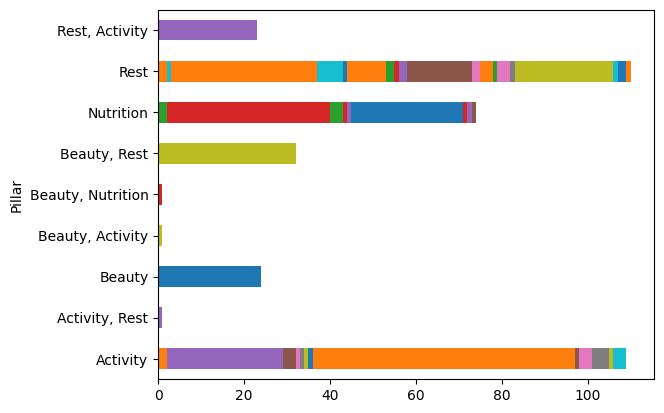

In [26]:
#the following cell shows the unique pillars or combinations of and how they are stacked
output_counts.plot(kind = 'barh', stacked = True, legend = False)

<Axes: xlabel='Categories', ylabel='Pillar'>

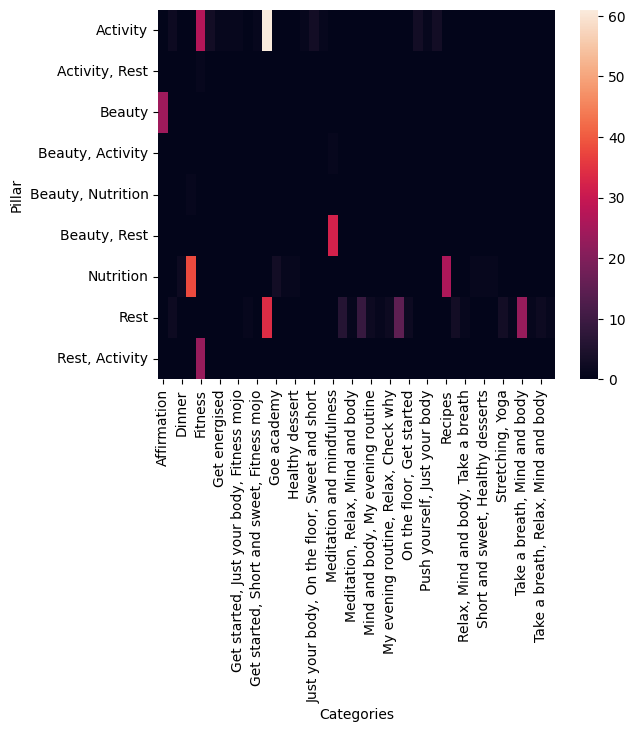

In [27]:
#import seaborn

#find heatmap for correlations
import seaborn as sns
sns.heatmap(output_counts)

## Transforming columns with NLP


We will try to use pca to lower the amount of categories specific to each pillar.

In [28]:
#get NLTK out of the way
import nltk
nltk.download('punkt')#library of words
nltk.download('words')#another library of words
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
import re
import nltk
from nltk import pos_tag#tags position
from nltk.tokenize import regexp_tokenize, word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords, wordnet# need
from nltk.stem import WordNetLemmatizer #need
sw = stopwords.words('english')

#what other stop wards can be used to that is not representative
#sw.extend([''])#
#added all punctuation, made sure # and @ wasnt in there
punctuation = '!"$%&\'()*+,-./:;<=>?[\]^_`{|}~“!'
twitter_re = re.compile('[#@][a-zA-Z]*')
num_re = re.compile('^\d{1}$')
hashtags = re.compile ("#([a-zA-Z0-9_]{1,50})")

def get_wordnet_pos(treebank_tag):
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def txt_clean(txt, stop_words=sw):
    # takes in a string and returns a cleaned up string ready for count or tfidf vectorizing

    # splitting the text up into words
    t = txt.split(' ')
    # turning the words lowercase
    t = [w.lower() for w in t]
    # removing punctuation
    t = [w.translate(w.maketrans('','', punctuation)) for w in t]
    # removing @'s and #'s which are twitter jargon
    t = [w for w in t if not twitter_re.match(w)]
    t = [w for w in t if not hashtags.match(w)]

    # removing leftover numbers
    t = [w for w in t if not num_re.match(w)]
    # removing stop words and more twitter jargon
    t = [w for w in t if w not in stop_words]
    # removing empty strings
    t = [w for w in t if w]

    # word lemmatizing
    t = pos_tag(t)
    t = [(w[0], get_wordnet_pos(w[1])) for w in t]
    lem = WordNetLemmatizer()
    t = [lem.lemmatize(w[0], w[1]) for w in t]
    # joining all the strings together into one
    return ' '.join(t)
output_counts.columns= output_counts.columns.map(txt_clean)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


<Axes: ylabel='Pillar'>

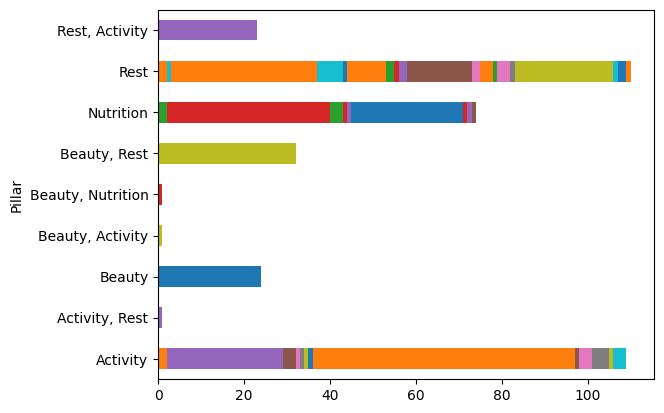

In [29]:
output_counts.plot(kind = 'barh', stacked = True, legend = False)

<Axes: xlabel='Categories', ylabel='Pillar'>

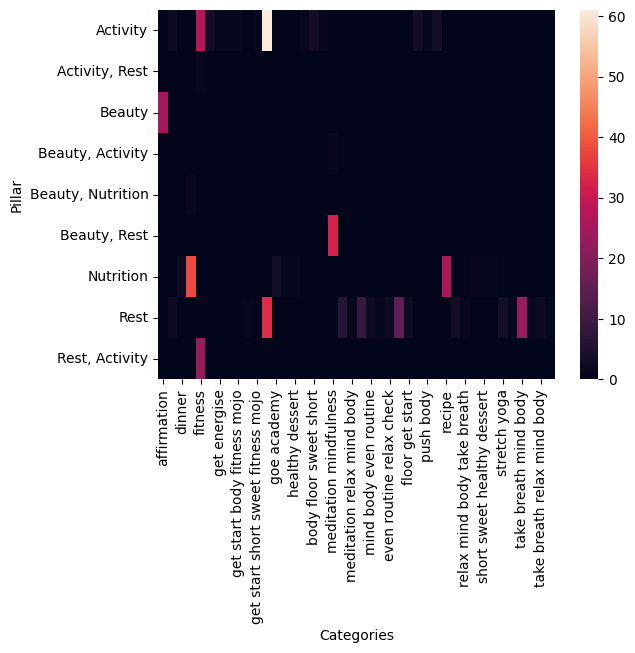

In [30]:
#import seaborn

#find heatmap for correlations
import seaborn as sns
sns.heatmap(output_counts)

In [31]:
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.2 MB/s eta 0:00:00


In [72]:
#use the raw df to analyze sentiment
def sentiment_scores(sentence):

    """
    This function serves as vader's provided documentation for sentiment, when we look at the thresholds, we consider scores less than -.1 as negative, and higher than .1 as positive
    In between is neutral, which we would like to minimize
    Ihave tried adaptive thresholds for finding the proper range but settled for the default due to it's pervalence across other language models
    """

    sid_obj = SentimentIntensityAnalyzer()
    #obtain sentance and find the score via the polarity_score fx
    sentiment_dict = sid_obj.polarity_scores(sentence)

    if sentiment_dict['compound'] >= 0.1 :
        return "Positive"

    elif sentiment_dict['compound'] <= - 0.1 :
        return "Negative"

    else :
        return "Neutral"

raw_df['Title_sentiment']= raw_df['Title'].map(sentiment_scores)

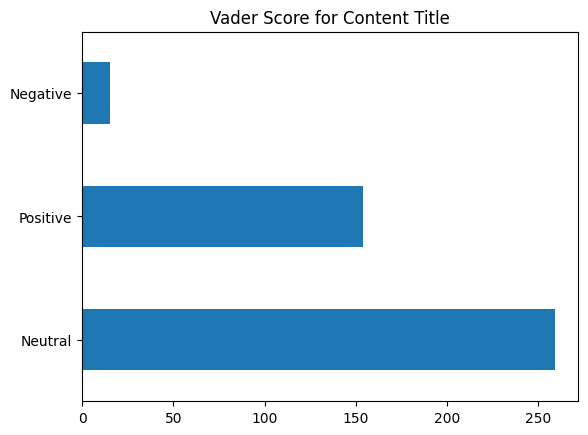

In [73]:
#visualize the distrubition
import matplotlib.pyplot as plt
raw_df['Title_sentiment'].value_counts().plot(kind='barh')
ax = plt.title("Vader Score for Content Title")
plt.show()

In [76]:
raw_df[raw_df['Title_sentiment'] == "Positive"]

,ID,Title,Pillar,Instructor,Categories,Difficulty,Difficulty_Num,Duration,Duration_Num,Require_Movement,Require_Movemen_Num,Tags,Source,Type,Audio,Recipe,Text,Video,Visualization,Activity,Beauty,Nutrition,Rest,Title_sentiment
0,14,A comprehensive guide to essential vitamins an...,Nutrition,NaN,Education,Intermediate,2,6-15 min,3,No,0.0,"Guide, Wellness, Education, Comprehensive, Nut...",Mockup,"Text, Video",0,0,1,1,0,0,0,1,0,Positive
1,122,A comprehensive guide to nutritional balance,Nutrition,NaN,Education,Intermediate,2,6-15 min,3,No,0.0,"Guide, Wellness, Education, Comprehensive, Nut...",Mockup,"Text, Video",0,0,1,1,0,0,0,1,0,Positive
2,352,A comprehensive guide to nutritional basics,Nutrition,NaN,Education,Intermediate,2,6-15 min,3,No,0.0,"Guide, Wellness, Education, Comprehensive, Nut...",Mockup,"Text, Video",0,0,1,1,0,0,0,1,0,Positive
3,280,A comprehensive guide to nutritional essentials,Nutrition,NaN,Education,Intermediate,2,6-15 min,3,No,0.0,"Guide, Wellness, Education, Essentials, Compre...",Mockup,"Text, Video",0,0,1,1,0,0,0,1,0,Positive
4,174,A comprehensive guide to vitamins and minerals,Nutrition,NaN,Education,Intermediate,2,6-15 min,3,No,0.0,"Guide, Wellness, Education, Comprehensive, Nut...",Mockup,"Text, Video",0,0,1,1,0,0,0,1,0,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
405,254,Why you should keep your core strong,Activity,Ola Kwiatkowska,Check why,Beginner,1,NaN,0,NaN,NaN,"Educational, Core series",Real,Audio,1,0,0,0,0,1,0,0,0,Positive
414,114,Yoga for becoming advanced,Activity,Nitti,NaN,Advanced,0,6-15 min,3,NaN,NaN,Yoga,Real,Video,0,0,0,1,0,1,0,0,0,Positive
419,124,Yoga for energy,Rest,Julie Chinmayi,Mind and body,Intermediate,2,15 - 30 min,4,NaN,NaN,Yoga,Real,Video,0,0,0,1,0,0,0,0,1,Positive
422,18,Yoga for relaxation,Rest,Julie Chinmayi,"Relax, Mind and body",Intermediate,2,15 - 30 min,4,NaN,NaN,"Pranayama, Breathing, Yoga",Real,Video,0,0,0,1,0,0,0,0,1,Positive


<Axes: >

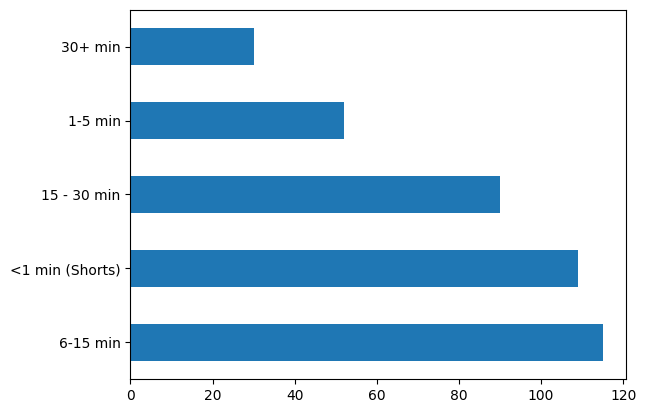

In [34]:
raw_df.Duration.value_counts().plot(kind = 'barh')

In [35]:
raw_df.Duration.isna().sum()

32

In [36]:
#look at the time spent on the title from the user side
#look at the time taken away
#was this title finished?
#other factors that influence user behavior
#what pillar was it
#updated cosine similarity score
#feedback given
#scrolling
#was the app terminated permaturely.
#PREVIOUSLY WATCHED
#extract from title nutrition: food type, food source, body weight, bmi, demographic factors, social factors
#extract from title activity: purely demogrpahics
#extract from title beauty: already given as affirmation
#extract from title rest: goe academy (leave as is)

#users percieved current mood
#how does the duration (from our df) impact their perception, are long videos worse and less recommended over all
#or are shorts better - this rquires ab testing
#time that the user interacts with the app (morning, day night
#using curisoity as a matrix, how likely is auser to interact with the title
#what other TOPICS (from title/categories/tags) can be recommended
#weekend user
#how can we use the tags in order to ossscilate between titles for future recommendations? (optimization problem)


#collab filtering = user behavior and interaction - uses matrix to plot content that they would enjor based on other
#stacked items

#content based filtering
#use tags to describe prodduct and a profile of a user's desired choices (genres)

In [37]:
#keeping the above in mind we will initiate a hybrid model
#first we use the cold start problem w/ a deep learning
#the designated objective function can either be dlassification or a regression model or the compactness (clustering analysis)

In [38]:
#building a mock user input df
mock_user = pd.DataFrame(columns =['user_id', 'title_or_pillar', 'time_on_title', 'time_scrolling', 'app_terminated_prematurely', 'completed_session', 'frequency_of_usage'] )

In [39]:
mock_user

,user_id,title_or_pillar,time_on_title,time_scrolling,app_terminated_prematurely,completed_session,frequency_of_usage


In [40]:
#create user id from 0-100000
mock_user

,user_id,title_or_pillar,time_on_title,time_scrolling,app_terminated_prematurely,completed_session,frequency_of_usage


In [41]:
#iserud list for matrix
user_id_list = list(range(0,10000))


In [42]:
#time on title matrix
import random
random.seed(42)
#% completed
time_on_title_list = [random.random() for _ in range(10000)]



In [43]:
import random

list_pillars = ['1', '2', '3', '4']

#The "ValueError: Sample larger than population or is negative" occurs when we use the random.sample() method to select more unique random elements than there are values in the list.


pillar_list = random.choices(list_pillars, k= 10000)



In [44]:
#set random 43 for time scrolling
random.seed(43)
time_scrolling_list = [random.random() for _ in range(10000)]

In [45]:
app_terminated_prematurely_list = ['yes', 'no']

premature_termination_list = random.choices(app_terminated_prematurely_list, k= 10000)

completed_session_list = random.choices(app_terminated_prematurely_list, k= 10000)

In [46]:
#frequency of usage
frequency_list_users = ['daily', 'weekend_user', 'monthly user', 'rarely']
frequency_list = random.choices(frequency_list_users, k= 10000)

In [47]:
rating_pillar = ['Positive', 'Negative']
rating_pillar_list = random.choices(rating_pillar, k = 10000)

In [48]:
mock_user['user_id'] = user_id_list
mock_user['title_or_pillar'] = pillar_list
mock_user['time_on_title'] = time_on_title_list
mock_user['time_scrolling'] = time_scrolling_list
mock_user['app_terminated_prematurely'] = premature_termination_list
mock_user['completed_session']  = completed_session_list
mock_user['frequency_of_usage'] = frequency_list
mock_user['rating_pillar_feedback'] = rating_pillar_list

In [49]:
mock_user

,user_id,title_or_pillar,time_on_title,time_scrolling,app_terminated_prematurely,completed_session,frequency_of_usage,rating_pillar_feedback
0,0,4,0.639427,0.038552,no,no,daily,Negative
1,1,4,0.025011,0.696224,no,no,daily,Negative
2,2,3,0.275029,0.143933,no,no,daily,Positive
3,3,4,0.223211,0.462532,no,yes,monthly user,Negative
4,4,1,0.736471,0.671647,yes,no,monthly user,Positive
...,...,...,...,...,...,...,...,...
9995,9995,3,0.924174,0.674574,no,no,daily,Negative
9996,9996,2,0.663336,0.244154,yes,no,rarely,Negative
9997,9997,2,0.878270,0.372349,yes,no,monthly user,Positive
9998,9998,3,0.235617,0.097612,no,yes,rarely,Positive


Collaborative Filtering

How do you determine which users or items are similar to one another?

Given that you know which users are similar, how do you determine the rating that a user would give to an item based on the ratings of similar users?

How do you measure the accuracy of the ratings you calculate? (RMSE, predict ratings for a test dataset of user-item pairs whose rating values are already known)/

*An approach in collaborative filtering is that the other featured engineered variables do not apply.

In [50]:
#!pip install scikit-surprise

In [51]:
#prepare mock data for collaborative filtering approach
mock_user_collab = mock_user.copy()

In [52]:
rating_pillar_list_collab = ['1', '2', '3', '4', '5']
rating_pillar_list_collab = random.choices(rating_pillar_list_collab, k = 10000)

In [53]:
user_id_collab_list = list(range(1000))
user_id_collab = random.choices(user_id_collab_list, k = 10000)

In [54]:
mock_user_collab['user_id'] = user_id_collab
mock_user_collab['rating_pillar_feedback'] = rating_pillar_list_collab

In [55]:
mock_user_collab

,user_id,title_or_pillar,time_on_title,time_scrolling,app_terminated_prematurely,completed_session,frequency_of_usage,rating_pillar_feedback
0,141,4,0.639427,0.038552,no,no,daily,4
1,244,4,0.025011,0.696224,no,no,daily,5
2,827,3,0.275029,0.143933,no,no,daily,4
3,7,4,0.223211,0.462532,no,yes,monthly user,3
4,228,1,0.736471,0.671647,yes,no,monthly user,3
...,...,...,...,...,...,...,...,...
9995,983,3,0.924174,0.674574,no,no,daily,5
9996,84,2,0.663336,0.244154,yes,no,rarely,5
9997,48,2,0.878270,0.372349,yes,no,monthly user,2
9998,673,3,0.235617,0.097612,no,yes,rarely,1


In [57]:
#https://realpython.com/build-recommendation-engine-collaborative-filtering/
#simple recommendation system based on knn
mock_user_collab2 = mock_user_collab[['user_id', 'title_or_pillar', 'rating_pillar_feedback']]

In [69]:
#Collaborative filtering user - item
#we make the matrix with the user id
mock_user_collab2['title'] = 'a'
mock_user_collab2

<ipython-input-69-2386f450df7b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mock_user_collab2['title'] = 'a'


,user_id,title_or_pillar,rating_pillar_feedback,title
0,141,4,NaN,a
1,244,4,NaN,a
2,827,3,NaN,a
3,7,4,NaN,a
4,228,1,NaN,a
...,...,...,...,...
9995,983,3,NaN,a
9996,84,2,NaN,a
9997,48,2,NaN,a
9998,673,3,NaN,a


In [59]:
interim_df = pd.DataFrame(columns = ['user_id', 1, 2, 3, 4, 'frequency1', 'frequency2', 'frequency3', 'frequency4'])

In [60]:
interim_df.user_id = list(range(0,1000))

In [61]:
interim_df['frequency1','frequency2','frequency3','frequency4'] = 0

In [62]:
interim_df['title_or_pillar'] = 0

In [63]:
interim_df['rating_pillar_feedback'] = 0